In [1]:
#pyspark 实现 K-means算法
# 2017013207 电商1701 丁泽锋
# 2020-05-02
import os
import sys
spark_name = os.environ.get('SPARK_HOME',None)
if not spark_name:
    raise ValueErrorError('spark环境没有配置好')
sys.path.insert(0,os.path.join(spark_name,'python'))
sys.path.insert(0,os.path.join(spark_name,'python/lib/py4j-0.10.7-src.zip'))
exec(open(os.path.join(spark_name,'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.5
      /_/

Using Python version 3.5.2 (default, Jul  5 2016 11:41:13)
SparkSession available as 'spark'.


In [2]:
'''
k均值聚类算法（k-means clustering algorithm）是一种迭代求解的聚类分析算法，其步骤是，
预将数据分为K组，则随机选取K个对象作为初始的聚类中心，
然后计算每个对象与各个种子聚类中心之间的距离，把每个对象分配给距离它最近的聚类中心。
聚类中心以及分配给它们的对象就代表一个聚类。每分配一个样本，聚类的聚类中心会根据聚类中现有的对象被重新计算。
这个过程将不断重复直到满足某个终止条件。终止条件可以是没有（或最小数目）对象被重新分配给不同的聚类，
没有（或最小数目）聚类中心再发生变化，误差平方和局部最小。
'''

'\nk均值聚类算法（k-means clustering algorithm）是一种迭代求解的聚类分析算法，其步骤是，\n预将数据分为K组，则随机选取K个对象作为初始的聚类中心，\n然后计算每个对象与各个种子聚类中心之间的距离，把每个对象分配给距离它最近的聚类中心。\n聚类中心以及分配给它们的对象就代表一个聚类。每分配一个样本，聚类的聚类中心会根据聚类中现有的对象被重新计算。\n这个过程将不断重复直到满足某个终止条件。终止条件可以是没有（或最小数目）对象被重新分配给不同的聚类，\n没有（或最小数目）聚类中心再发生变化，误差平方和局部最小。\n'

In [3]:
# 随机浮点数：
import random
import string

for ii in range(0,20):
    print("            (Vectors.dense(["+'%.1f' %(random.random()*10)+", "+('%.1f' %(random.random()*10))+"]),),")
    

            (Vectors.dense([7.1, 5.0]),),
            (Vectors.dense([1.9, 2.3]),),
            (Vectors.dense([0.4, 0.9]),),
            (Vectors.dense([7.6, 1.0]),),
            (Vectors.dense([0.8, 7.4]),),
            (Vectors.dense([4.4, 8.3]),),
            (Vectors.dense([4.8, 3.5]),),
            (Vectors.dense([0.5, 8.5]),),
            (Vectors.dense([1.3, 3.1]),),
            (Vectors.dense([9.6, 6.5]),),
            (Vectors.dense([7.6, 0.6]),),
            (Vectors.dense([3.8, 1.4]),),
            (Vectors.dense([8.9, 8.6]),),
            (Vectors.dense([3.1, 3.9]),),
            (Vectors.dense([9.6, 3.1]),),
            (Vectors.dense([1.9, 7.4]),),
            (Vectors.dense([6.1, 9.4]),),
            (Vectors.dense([7.9, 2.3]),),
            (Vectors.dense([9.6, 6.7]),),
            (Vectors.dense([1.3, 9.6]),),


In [4]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
import pandas as pd
 
if __name__ == "__main__":
    appname = "KMeans"
    master ="local[4]" 
    conf = SparkConf().setAppName(appname).setMaster(master)  #spark配置                
    spark=SparkSession.builder.config(conf=conf).getOrCreate()#spark实例化
#读取数据
    data = [(Vectors.dense([1.0, 3.7]),),
            (Vectors.dense([3.3, 7.1]),),
            (Vectors.dense([9.4, 6.2]),),
            (Vectors.dense([5.1, 3.0]),),
            (Vectors.dense([3.5, 0.7]),),
            (Vectors.dense([5.6, 6.4]),),
            (Vectors.dense([7.7, 3.3]),),
            (Vectors.dense([4.3, 2.6]),),
            (Vectors.dense([0.3, 1.2]),),
            (Vectors.dense([8.1, 6.3]),),
            (Vectors.dense([7.6, 9.8]),),
            (Vectors.dense([1.3, 0.3]),),
            (Vectors.dense([7.8, 6.1]),),
            (Vectors.dense([1.4, 2.7]),),
            (Vectors.dense([9.5, 6.1]),),
            (Vectors.dense([5.3, 0.5]),),
            (Vectors.dense([2.4, 5.0]),),
            (Vectors.dense([9.3, 0.0]),),
            (Vectors.dense([2.0, 7.3]),),
            (Vectors.dense([8.8, 3.0]),),
            (Vectors.dense([6.1, 5.7]),),
            (Vectors.dense([8.0, 9.0]),)]    
    df = spark.createDataFrame(data, ["features"])
 
#用k均值进行聚类    
    kmeans = KMeans(k=2, seed=1)
    model = kmeans.fit(df)
    centers = model.clusterCenters()
    model.computeCost(df)#每个点到其中心距离平方和
    result = model.transform(df).select("features", "prediction")#输出聚类结果
 
#将聚类结果转为python中的dataframe
    columns=result.columns#提取强表字段
    result=result.collect()#
    result=pd.DataFrame(result,columns=columns)#转为python中的dataframe
    print(result)
    spark.stop()

      features  prediction
0   [1.0, 3.7]           0
1   [3.3, 7.1]           1
2   [9.4, 6.2]           1
3   [5.1, 3.0]           0
4   [3.5, 0.7]           0
5   [5.6, 6.4]           1
6   [7.7, 3.3]           1
7   [4.3, 2.6]           0
8   [0.3, 1.2]           0
9   [8.1, 6.3]           1
10  [7.6, 9.8]           1
11  [1.3, 0.3]           0
12  [7.8, 6.1]           1
13  [1.4, 2.7]           0
14  [9.5, 6.1]           1
15  [5.3, 0.5]           0
16  [2.4, 5.0]           0
17  [9.3, 0.0]           0
18  [2.0, 7.3]           1
19  [8.8, 3.0]           1
20  [6.1, 5.7]           1
21  [8.0, 9.0]           1


In [5]:
for ai in range (0,22):
    aii = int(result[ai:ai+1]['prediction'])
    if aii == 0:
      print(result[ai:ai+1]) 
    
for ai in range (0,22):
    aii = int(result[ai:ai+1]['prediction'])
    if aii == 1:
      print(result[ai:ai+1]) 

     features  prediction
0  [1.0, 3.7]           0
     features  prediction
3  [5.1, 3.0]           0
     features  prediction
4  [3.5, 0.7]           0
     features  prediction
7  [4.3, 2.6]           0
     features  prediction
8  [0.3, 1.2]           0
      features  prediction
11  [1.3, 0.3]           0
      features  prediction
13  [1.4, 2.7]           0
      features  prediction
15  [5.3, 0.5]           0
      features  prediction
16  [2.4, 5.0]           0
      features  prediction
17  [9.3, 0.0]           0
     features  prediction
1  [3.3, 7.1]           1
     features  prediction
2  [9.4, 6.2]           1
     features  prediction
5  [5.6, 6.4]           1
     features  prediction
6  [7.7, 3.3]           1
     features  prediction
9  [8.1, 6.3]           1
      features  prediction
10  [7.6, 9.8]           1
      features  prediction
12  [7.8, 6.1]           1
      features  prediction
14  [9.5, 6.1]           1
      features  prediction
18  [2.0, 7.3]       

D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


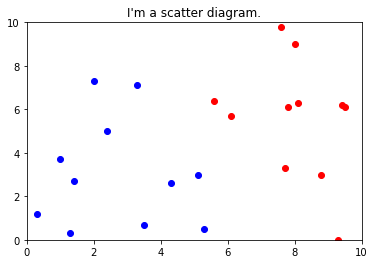

In [6]:
%matplotlib inline
"蓝色和红色分别表示两类"
import matplotlib.pyplot as plt
plt.title("I'm a scatter diagram.") 
plt.xlim(xmax=10,xmin=0)
plt.ylim(ymax=10,ymin=0)
plt.plot([9.4,5.6,7.7,8.1,7.6,7.8,9.5,9.3,8.8,6.1,8.0],[6.2, 6.4,3.3, 6.3, 9.8, 6.1, 6.1,0.0,3.0,5.7,9.0],'ro')
plt.plot([1.0,3.3,5.1,3.5,4.3,0.3,1.3,1.4,5.3,2.4,2.0],[3.7, 7.1,3.0, 0.7, 2.6, 1.2, 0.3,2.7,0.5,5.0,7.3],'bo')
plt.show()